PyCon: Pandas script for practicing

In [84]:
%matplotlib inline
import pandas as pd

OPERATION CHEATS

In [69]:
  """
  len(df)       series + value    df[df.c == value]
  df.head()     series + series2  df[(df.c >= value) & (df.d < value)]
  df.tail()     series.notnull()  df[(df.c < value) | (df.d != value)]
  df.COLUMN     series.isnull()   df.sort('column')
  df['COLUMN']  series.order()    df.sort(['column1', 'column2'])
  """

"\nlen(df)       series + value    df[df.c == value]\ndf.head()     series + series2  df[(df.c >= value) & (df.d < value)]\ndf.tail()     series.notnull()  df[(df.c < value) | (df.d != value)]\ndf.COLUMN     series.isnull()   df.sort('column')\ndf['COLUMN']  series.order()    df.sort(['column1', 'column2'])\n"

In [73]:
"""
  s.str.len()        s.value_counts()
  s.str.contains()   s.sort_index()    df[['column1', 'column2']]
  s.str.startswith() s.plot(...)       df.plot(x='a', y='b', kind='bar')
"""

"\n  s.str.len()        s.value_counts()\n  s.str.contains()   s.sort_index()    df[['column1', 'column2']]\n  s.str.startswith() s.plot(...)       df.plot(x='a', y='b', kind='bar')\n"

In [74]:
"""
  df.set_index('a').sort_index()        df.loc['value']
  df.set_index(['a', 'b']).sort_index() df.loc[('v','u')]
  df.groupby('column')                  .size() .mean() .min() .max()
  df.groupby(['column1', 'column2'])    .agg(['min', 'max'])
"""

"\n  df.set_index('a').sort_index()        df.loc['value']\n  df.set_index(['a', 'b']).sort_index() df.loc[('v','u')]\n  df.groupby('column')                  .size() .mean() .min() .max()\n  df.groupby(['column1', 'column2'])    .agg(['min', 'max'])\n"

In [75]:
'''
  df.unstack()      s.dt.year       df.merge(df2, how='outer', ...)
  df.stack()        s.dt.month    df.rename({'a': 'y', 'b': 'z'})
  df.fillna(value)  s.dt.day        pd.concat([df1, df2])
  s.fillna(value)   s.dt.dayofweek
'''

"\n  df.unstack()      s.dt.year       df.merge(df2, how='outer', ...)\n  df.stack()        s.dt.month    df.rename({'a': 'y', 'b': 'z'})\n  df.fillna(value)  s.dt.day        pd.concat([df1, df2])\n  s.fillna(value)   s.dt.dayofweek\n"

DIGGING INTO THE DATA

In [23]:
titles = pd.read_csv('data/titles.csv',index_col=None,encoding='utf-8')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [24]:
release_dates = pd.read_csv('data/release_dates.csv',index_col=None,encoding='utf-8')
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [25]:
cast = pd.read_csv('cast.csv',index_col=None,encoding='utf-8')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [26]:
len(titles)

230621

In [31]:
titles.tail()

,title,year
230616,Nobody Waved Good-bye,1964
230617,E yue,2005
230618,Lakota Girls,2015
230619,Kroniki domowe,1997
230620,Death in the Valley of Good and Evil,2018


In [32]:
t = titles.head(8)
# allows you to save dataframe objects that are manipulated or paired down
t

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
5,Medusa (IV),2015
6,The Fresh Air Will Do You Good,2008
7,Alex in Wonderland,1970


In [37]:
#filter a dataframe that only match a certain criteria
#series of the year column
t['year']
# add 10,000
t['year'] + 10000
#decades only
t['year'] // 10 * 10

0    1990
1    1960
2    1990
3    2000
4    2010
5    2010
6    2000
7    1970
Name: year, dtype: int64

In [40]:
#just using the column name, no brackets and operators to filter
# returns a boolean on whether it matches the condition
t.year > 1985

0     True
1    False
2     True
3     True
4     True
5     True
6     True
7    False
Name: year, dtype: bool

In [43]:
#using square brackets, pandas gives back the rows in the dataframe that meet the condition
t[t.year > 1985]

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
5,Medusa (IV),2015
6,The Fresh Air Will Do You Good,2008


In [55]:
# two comparisons in the same search... added a head for reading ability
"If you want 'or': |"
titles[(titles.year > 1980) & (titles.year < 1990)].head()


,title,year
22,Ang pumatay ng dahil sa iyo,1989
59,Migimagari No Dandy,1989
62,I lagens namn,1986
65,Bruce's Ninja Secret,1988
72,Insaaf Main Karoonga,1985


In [56]:
t = titles
c = cast
r = release_dates

In [62]:
#searching through the titles table in the title column that matches 'Macbeth', then sorting by 'year' and filtering only the head
t[t.title=='Macbeth'].sort_values('year').head()

,title,year
4162,Macbeth,1913
67313,Macbeth,1916
157917,Macbeth,1948
203220,Macbeth,1987
16930,Macbeth,1997


In [71]:
h = cast.head()
h = h[h.n.notnull()]
h

,title,year,name,type,character,n
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [72]:
h = c.head()
h = h[h.n.isnull()]
h

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [80]:
#filtering with the string method
#check documentation for other .str. methods
t.title.str.startswith('The')
t.title.str.endswith('I')
t.title.str.contains('The').head()

0     True
1     True
2    False
3    False
4    False
Name: title, dtype: bool

In [82]:
#how many titles per year
titles.year.value_counts().head()

2016    11061
2015     8664
2017     8379
2014     8076
2013     7674
Name: year, dtype: int64

How many movies have been made by year?

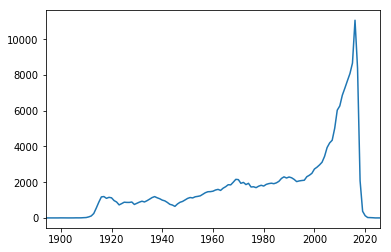

In [90]:
#make a quick plot of a filter... make sure to take into consideration the index
titles.year.value_counts().sort_index().plot()

How is Kermit doing as far as getting roles?

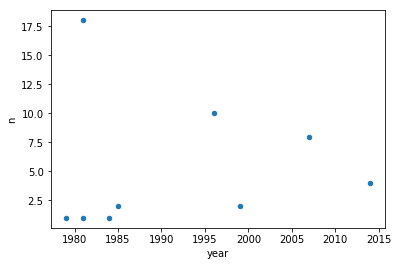

In [93]:
#another way to get a quick plot without reseting the index
kermit = cast
k = kermit[kermit.character == 'Kermit the Frog']
k.plot(x='year',y='n',kind='scatter')

In [99]:
#how long does a search take?
len(c)
%time
c[c.title == 'Sleuth']

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.9 µs


,title,year,name,type,character,n
250297,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
314691,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
314692,Sleuth,2007,Michael Caine,actor,Andrew,1.0
360365,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
360366,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1246855,Sleuth,2007,Jude Law,actor,Milo,2.0
1396572,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1412647,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1644328,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1741124,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [107]:
# set_index is an operation that lets you replace the index
# almost puts you in the situation like a dictionary where you can search key:value pairs
p = c.set_index(['title']).sort_index()

In [112]:
# do this to use .loc and do square bracket lookups
# notice that the index is the title column
%time
p.loc['Sleuth'].head()

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.9 µs


,year,name,type,character,n
title,,,,,
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN


In [111]:
%time
p.loc['The Wizard of Oz'].head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


,year,name,type,character,n
title,,,,,
The Wizard of Oz,1939,Charles Irwin,actor,Tin Polisher,NaN
The Wizard of Oz,1939,Lee Murray,actor,Winged Monkey,NaN
The Wizard of Oz,1939,Fern Formica,actress,Munchkin Villager,NaN
The Wizard of Oz,1939,Fern Formica,actress,Sleepyhead,NaN
The Wizard of Oz,1939,Betty Tanner,actress,Munchkin Villager,NaN


In [115]:
# can also set the index with two levels
%time
p = c.set_index(['title','year']).sort_index()
p.head()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [118]:
# now able to search two indexes... just use .loc twice or pass through parenth
#p.loc['Sleuth'].loc[1972]

# build me a 'Sleuth', 1972 df
p.loc[('Sleuth',1972)]

name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [123]:
# reset index
# p.loc[('Sleuth',1972)].reset_index('year')
# p.loc[('Sleuth',1972)].reset_index('title')
p.loc[('Sleuth',1972)].reset_index(['year','title'])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


**SOME FUN WITH GROUPBY**

In [125]:
c = cast
c = c[c.name == 'George Clooney']
c.head()

,title,year,name,type,character,n
419772,A Very Murray Christmas,2015,George Clooney,actor,George Clooney,4.0
419773,Batman & Robin,1997,George Clooney,actor,Batman,2.0
419774,Batman & Robin,1997,George Clooney,actor,Bruce Wayne,2.0
419775,Burn After Reading,2008,George Clooney,actor,Harry Pfarrer,1.0
419776,Confessions of a Dangerous Mind,2002,George Clooney,actor,Jim Byrd,17.0


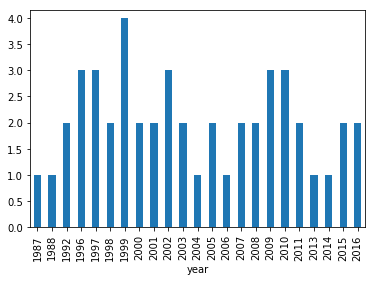

In [139]:
# .size() tells you how many rows met your groupby
c.groupby(['title','year','character']).size()
c.groupby(['title','year',]).size()
c.groupby(['year']).size().plot(ylim=0)
c.groupby(['year']).size().plot(kind='bar')